In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

In [3]:
youtube = pd.read_csv('USvideos1.csv')

In [4]:
def ganti_tanggal_trending(cols):
    year = cols[0:2]
    month = cols[6:8]
    day = cols[3:5]
    cols = '20'+'{}.{}.{}'.format(year,month,day)
    return cols

youtube['trending_date'] = youtube['trending_date'].apply(ganti_tanggal_trending)

In [5]:
youtube['trending_date'] = pd.to_datetime(youtube['trending_date'],utc='none')
youtube['publish_time'] = pd.to_datetime(youtube['publish_time'])

In [6]:
youtube['trending_gap'] = youtube['trending_date'] - youtube['publish_time']

In [7]:
youtube['delta_like'] = youtube['likes']-youtube['dislikes']

In [109]:
youtube_delta_0 = youtube[(youtube['delta_like'] == 0)]
youtube_delta_0.head()

,video_id,trending_date,title,channel_title,category_id,category_name,publish_time,tags,views,likes,...,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,trending_gap,delta_like,day_name,upload_time
192,wRGldR_SQAA,2017-11-14 00:00:00+00:00,Apple Clips sample,Steve Kovach,22,People & Blogs,2017-11-09 18:01:04+00:00,[none],2259,0,...,0,https://i.ytimg.com/vi/wRGldR_SQAA/default.jpg,False,False,False,Clips 2.0 lets you use augmented reality and s...,4 days 05:58:56,0,Thursday,18
1435,Kn5UgGQukYQ,2017-11-21 00:00:00+00:00,Breaking Bad's Bryan Cranston on Meeting Charl...,hudsonunionsociety,1,Film & Animation,2016-10-14 21:14:51+00:00,"Breaking Bad|""Bryan Cranston""|""malcom in the m...",15058,0,...,0,https://i.ytimg.com/vi/Kn5UgGQukYQ/default.jpg,True,True,False,The Hudson Union www.hudsonunionsociety.com is...,402 days 02:45:09,0,Friday,21
1667,Kn5UgGQukYQ,2017-11-22 00:00:00+00:00,Breaking Bad's Bryan Cranston on Meeting Charl...,hudsonunionsociety,1,Film & Animation,2016-10-14 21:14:51+00:00,"Breaking Bad|""Bryan Cranston""|""malcom in the m...",34207,0,...,0,https://i.ytimg.com/vi/Kn5UgGQukYQ/default.jpg,True,True,False,The Hudson Union www.hudsonunionsociety.com is...,403 days 02:45:09,0,Friday,21
1868,_akwfRuL4os,2017-11-23 00:00:00+00:00,Highlights of the EA predatory behavior announ...,chris lee,22,People & Blogs,2017-11-21 19:29:03+00:00,[none],160012,0,...,1722,https://i.ytimg.com/vi/_akwfRuL4os/default.jpg,False,True,False,The State of Hawaii announces action to addres...,1 days 04:30:57,0,Tuesday,19
1914,Kn5UgGQukYQ,2017-11-23 00:00:00+00:00,Breaking Bad's Bryan Cranston on Meeting Charl...,hudsonunionsociety,1,Film & Animation,2016-10-14 21:14:51+00:00,"Breaking Bad|""Bryan Cranston""|""malcom in the m...",36137,0,...,0,https://i.ytimg.com/vi/Kn5UgGQukYQ/default.jpg,True,True,False,The Hudson Union www.hudsonunionsociety.com is...,404 days 02:45:09,0,Friday,21


### why do you think there is a trend video that did not had no difference at all between the number of likes and dislikes?

##### Jawab: Answer: because most videos that delta_like == 0 from the creator content mostly have ratings_disabled value True, the way to disable YouTube video rating can be seen in the following link https://support.google.com/youtube/thread/17854344?hl=en

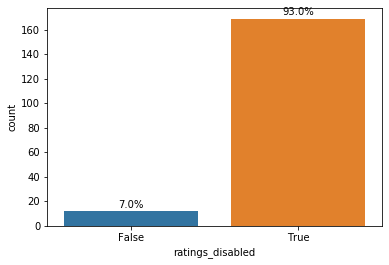

<Figure size 864x864 with 0 Axes>

In [9]:
from matplotlib.pyplot import show
ax = sns.countplot(x = 'ratings_disabled', data = youtube[(youtube['delta_like'] == 0)])
total = int(len(youtube[(youtube['delta_like'] == 0)]))
plt.figure(figsize=(12,12))
plt
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{}%'.format(round(height/total*100)),
            ha="center") 
show()

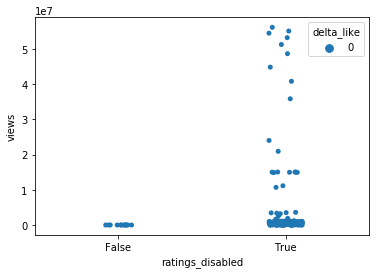

In [10]:
sns.stripplot(x='ratings_disabled', y='views',data=youtube[(youtube['delta_like'] == 0)],jitter=True,hue='delta_like')

##### As for videos that are rating_disabled == False but delta_like == 0 because the views are less than 7400 as can be seen in the table below, which means that the video is less desirable by Youtube viewers.

In [11]:
youtube[(youtube['delta_like'] == 0) & (youtube['ratings_disabled'] == False)]

,video_id,trending_date,title,channel_title,category_id,category_name,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,trending_gap,delta_like
192,wRGldR_SQAA,2017-11-14 00:00:00+00:00,Apple Clips sample,Steve Kovach,22,People & Blogs,2017-11-09 18:01:04+00:00,[none],2259,0,0,0,https://i.ytimg.com/vi/wRGldR_SQAA/default.jpg,False,False,False,Clips 2.0 lets you use augmented reality and s...,4 days 05:58:56,0
1921,v6d1rShfyZk,2017-11-23 00:00:00+00:00,YouTube Back on Echo Show,Voicebot,22,People & Blogs,2017-11-21 16:02:44+00:00,"Amazon Alexa|""Amazon Echo Show""|""Echo Show""|""Y...",2869,2,2,0,https://i.ytimg.com/vi/v6d1rShfyZk/default.jpg,False,False,False,NaN,1 days 07:57:16,0
2122,v6d1rShfyZk,2017-11-24 00:00:00+00:00,YouTube Back on Echo Show,Voicebot,22,People & Blogs,2017-11-21 16:02:44+00:00,"Amazon Alexa|""Amazon Echo Show""|""Echo Show""|""Y...",3409,2,2,0,https://i.ytimg.com/vi/v6d1rShfyZk/default.jpg,False,False,False,NaN,2 days 07:57:16,0
2337,v6d1rShfyZk,2017-11-25 00:00:00+00:00,YouTube Back on Echo Show,Voicebot,22,People & Blogs,2017-11-21 16:02:44+00:00,"Amazon Alexa|""Amazon Echo Show""|""Echo Show""|""Y...",3800,2,2,0,https://i.ytimg.com/vi/v6d1rShfyZk/default.jpg,False,False,False,NaN,3 days 07:57:16,0
2557,v6d1rShfyZk,2017-11-26 00:00:00+00:00,YouTube Back on Echo Show,Voicebot,22,People & Blogs,2017-11-21 16:02:44+00:00,"Amazon Alexa|""Amazon Echo Show""|""Echo Show""|""Y...",4114,2,2,0,https://i.ytimg.com/vi/v6d1rShfyZk/default.jpg,False,False,False,NaN,4 days 07:57:16,0
2778,v6d1rShfyZk,2017-11-27 00:00:00+00:00,YouTube Back on Echo Show,Voicebot,22,People & Blogs,2017-11-21 16:02:44+00:00,"Amazon Alexa|""Amazon Echo Show""|""Echo Show""|""Y...",4386,2,2,1,https://i.ytimg.com/vi/v6d1rShfyZk/default.jpg,False,False,False,NaN,5 days 07:57:16,0
10704,Wwyxaow1wWg,2018-01-06 00:00:00+00:00,Inventing The Wheel,J Gasser,24,Entertainment,2017-11-08 22:27:53+00:00,[none],987,1,1,0,https://i.ytimg.com/vi/Wwyxaow1wWg/default.jpg,False,False,False,How The Wheel Was Really Invented.,58 days 01:32:07,0
12559,yUMalTN2OvM,2018-01-17 00:00:00+00:00,IoT kit robot #3,eba era,10,Music,2014-03-07 22:39:36+00:00,"Aruduino|""Robot""|""Sensor""",3456,4,4,5,https://i.ytimg.com/vi/yUMalTN2OvM/default.jpg,False,False,False,NaN,1411 days 01:20:24,0
13714,Ow-plaMZHT8,2018-01-23 00:00:00+00:00,old dodge stratus commercial,jeremiah johnson,2,Autos & Vehicles,2016-05-13 20:47:57+00:00,"dodge stratus|""dodge stratus commercial""|""comm...",3215,4,4,4,https://i.ytimg.com/vi/Ow-plaMZHT8/default.jpg,False,False,False,old dodge stratus commercial Check this out! h...,619 days 03:12:03,0
13965,Ow-plaMZHT8,2018-01-24 00:00:00+00:00,old dodge stratus commercial,jeremiah johnson,2,Autos & Vehicles,2016-05-13 20:47:57+00:00,"dodge stratus|""dodge stratus commercial""|""comm...",3312,4,4,4,https://i.ytimg.com/vi/Ow-plaMZHT8/default.jpg,False,False,False,old dodge stratus commercial Check this out! h...,620 days 03:12:03,0


In [12]:
youtube['publish_time'] = pd.to_datetime(youtube['publish_time'])
youtube['day_name'] = youtube['publish_time'].dt.day_name()
youtube['upload_time'] = youtube['publish_time'].dt.hour

In [13]:
youtube.head()

,video_id,trending_date,title,channel_title,category_id,category_name,publish_time,tags,views,likes,...,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,trending_gap,delta_like,day_name,upload_time
0,2kyS6SvSYSE,2017-11-14 00:00:00+00:00,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,People & Blogs,2017-11-13 17:13:01+00:00,SHANtell martin,748374,57527,...,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,0 days 06:46:59,54561,Monday,17
1,1ZAPwfrtAFY,2017-11-14 00:00:00+00:00,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,Entertainment,2017-11-13 07:30:00+00:00,"last week tonight trump presidency|""last week ...",2418783,97185,...,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",0 days 16:30:00,91039,Monday,7
2,5qpjK5DgCt4,2017-11-14 00:00:00+00:00,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,Comedy,2017-11-12 19:05:24+00:00,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,...,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,1 days 04:54:36,140694,Sunday,19
3,puqaWrEC7tY,2017-11-14 00:00:00+00:00,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,Entertainment,2017-11-13 11:00:04+00:00,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,...,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...,0 days 12:59:56,9506,Monday,11
4,d380meD0W0M,2017-11-14 00:00:00+00:00,I Dare You: GOING BALD!?,nigahiga,24,Entertainment,2017-11-12 18:01:41+00:00,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,...,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,1 days 05:58:19,130246,Sunday,18


In [14]:
youtube_test = youtube.copy()
youtube_test['upload_time'].replace(0, 24,inplace=True)

## MOST VIEWED YOUTUBE VIDEO BASED ON DAY
###### content creator can upload on Friday or Sunday if they want to get more viewers

<Figure size 720x720 with 0 Axes>

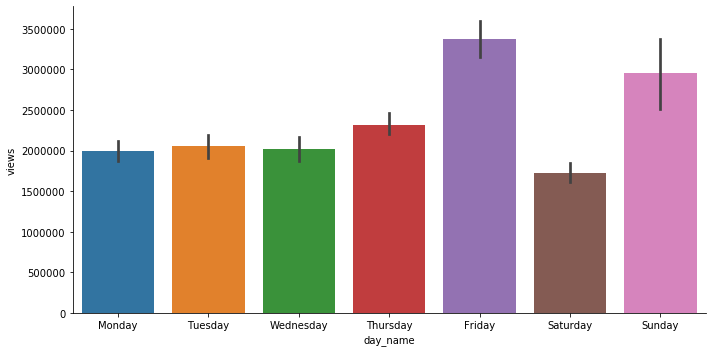

In [15]:
plt.figure(figsize=(10,10))
sns.catplot(x='day_name',y='views',data=youtube_test,kind='bar',
               order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'],aspect=2)

## Most Viewed (Green Highlight) Youtube Video Based on Upload Time & Day of Week
#### This can be useful if the content creator wants to upload video everyday (and can choose the right time for upload the video) then get more viewer

In [16]:
pd.options.display.float_format = '{:,.0f}'.format
def highlight_max(s):
    is_max = s.round() == s.max()
    return ['background-color: green' if v else '' for v in is_max]

pvt_ytb = youtube_test.pivot_table(values='views',index='upload_time',columns='day_name')
a = pvt_ytb.round()
a = a[['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']]
a.style.apply(highlight_max)

day_name,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
upload_time,,,,,,,
1,4.51971e+06,1.33158e+06,1.63609e+06,1.10914e+06,1.98528e+06,855275,1.00845e+06
2,2.78632e+06,1.32404e+06,1.42478e+06,464695,1.53094e+06,6.3236e+06,378171
3,814035,8.29358e+06,790647,2.47043e+06,4.2823e+06,1.00396e+06,2.65624e+06
4,1.51775e+06,2.43231e+06,1.0724e+06,5.93029e+06,6.83859e+06,689264,4.16669e+07
5,1.05453e+06,3.04278e+06,885135,1.0186e+06,3.42047e+06,4.64711e+06,992974
6,775111,287565,3.99938e+06,1.62209e+06,1.33857e+06,516637,1.6314e+06
7,1.68741e+06,7.3732e+06,8.40145e+06,935675,4.20745e+06,1.54875e+06,2.41525e+06
8,8.51913e+06,473637,710412,1.014e+06,3.20352e+06,4.40174e+06,8.15819e+06
9,8.17878e+06,1.58531e+06,3.80572e+06,2.57886e+06,1.27904e+07,45268,1.535e+06


## MOST VIEWED VIDEO BASED ON CATEGORY NAME(https://gist.github.com/dgp/1b24bf2961521bd75d6c)
#### This can be useful for company if they want to put ads on Youtube to be more effective

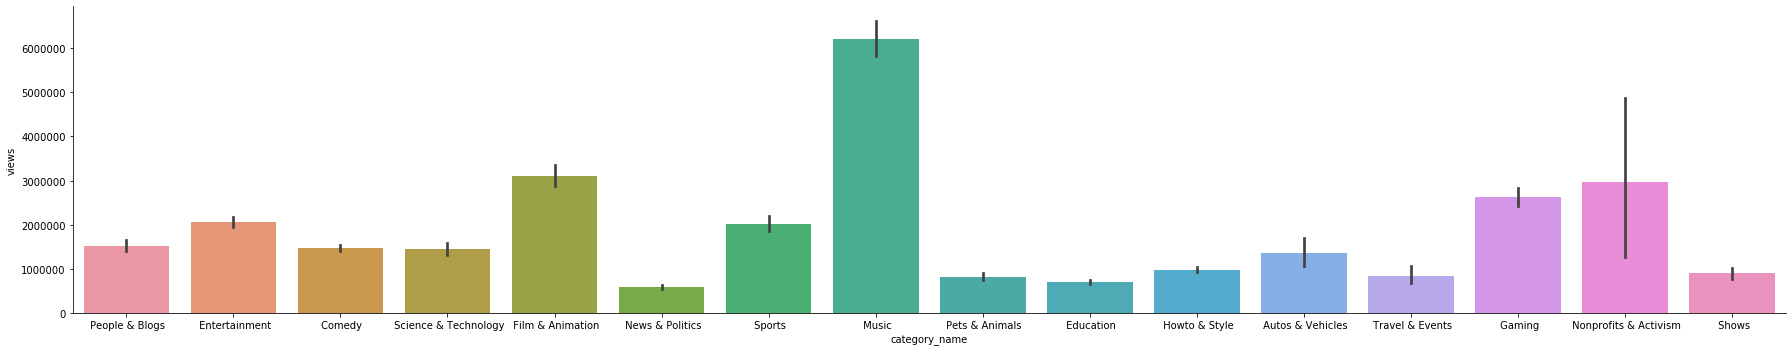

In [81]:
# plt.figure(figsize=(30,30))
sns.catplot(x='category_name',y='views',data=youtube_test,kind='bar', aspect=5)

## QQ PLOT

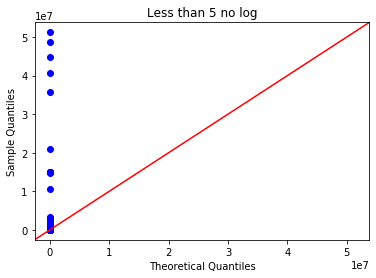

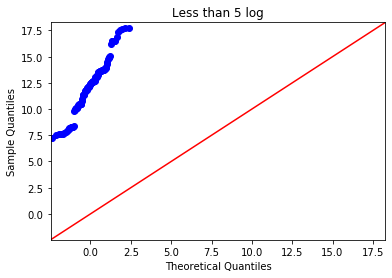

In [18]:
import statsmodels.api as sm
import pylab

sm.qqplot(youtube_delta_0[youtube_delta_0['trending_gap'].dt.days <= 5]['views'],line = '45')
plt.title('Less than 5 no log')

sm.qqplot(np.log(youtube_delta_0[youtube_delta_0['trending_gap'].dt.days <= 5]['views']),line = '45')
plt.title('Less than 5 log')
pylab.show()

In [19]:
from scipy.stats import shapiro,normaltest,anderson

def trynormal(data):
    result={'Anderson': {i:j for i,j in zip(anderson(data)[2],anderson(data)[1])}, 'Shapiro': shapiro(data)[1],
            'K^2': normaltest(data)[1]}
    result['Anderson']['stat'] = anderson(data)[0]
    return result

In [20]:
anderson(youtube_delta_0[youtube_delta_0['trending_gap'].dt.days <= 5]['views'])

AndersonResult(statistic=30.011856798477254, critical_values=array([0.558, 0.635, 0.762, 0.889, 1.057]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

In [21]:
trynormal(youtube_delta_0[youtube_delta_0['trending_gap'].dt.days <= 5]['views'])

{'Anderson': {15.0: 0.558,
  10.0: 0.635,
  5.0: 0.762,
  2.5: 0.889,
  1.0: 1.057,
  'stat': 30.011856798477254},
 'Shapiro': 6.093685768783008e-20,
 'K^2': 7.23626649326126e-26}

C:\Users\catin\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: VisibleDeprecationWarning:

Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.



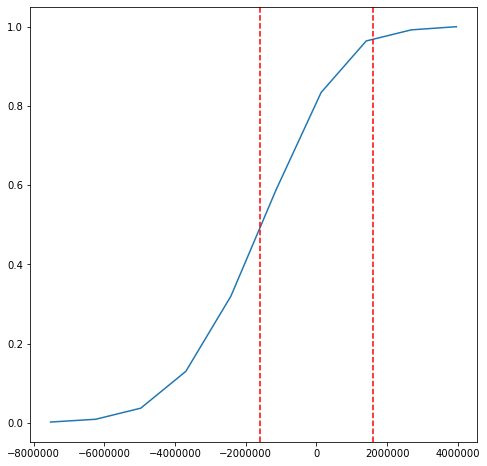

In [70]:
def mean_differencies(x1, x2, n_boot):
    ori_mean = x1.mean() - x2.mean()
    mean_diff = []
    for i in range(n_boot):
        x1_mean = x1.sample(len(x1), replace = True).mean()
        x2_mean = x2.sample(len(x2), replace = True).mean()
        mean_diff.append(x1_mean-x2_mean)

    hist,hist_edges = np.histogram(mean_diff, bins = 10, normed = True)
    dx = hist_edges[1] - hist_edges[0]
    F1 = np.cumsum(hist)*dx
    plt.figure(figsize = (8,8))
    plt.plot(hist_edges[1:], F1)
    plt.axvline(ori_mean, ls = '--', c = 'r')
    plt.axvline(ori_mean*-1, ls= '--' , c = 'r')

mean_differencies(youtube_delta_0[youtube_delta_0['trending_gap'].dt.days <= 5]['views'],
                  youtube_delta_0[youtube_delta_0['trending_gap'].dt.days > 5]['views'],1000)

## NON PARAMETRIC TEST

In [74]:
pd.concat([youtube_delta_0[youtube_delta_0['trending_gap'].dt.days <= 5]['views'].reset_index(drop=True),
          youtube_delta_0[youtube_delta_0['trending_gap'].dt.days > 5]['views'].reset_index(drop=True)],axis = 1).corr()

,views,views
views,1,-0
views,-0,1


In [77]:
from scipy.stats import mannwhitneyu
result = list(mannwhitneyu(youtube_delta_0[youtube_delta_0['trending_gap'].dt.days <= 5]['views'],
                           youtube_delta_0[youtube_delta_0['trending_gap'].dt.days > 5]['views']))
print('U-Statistic:',result[0])
print('P-value:',result[1])

U-Statistic: 2875.0
P-value: 0.00278489919300189


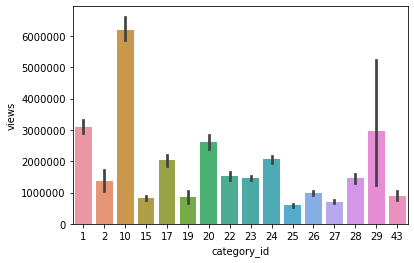

In [82]:
sns.barplot(data = youtube, x = 'category_id', y ='views')

## QUESTION

###### Saya pernah membaca bahwa Trend video juga tergantung kategori, jika kita barplot kan category 10 dan 29 memiliki mean yang tertinggi (walau mean dari 29 besar jaraknya) berarti mereka menarik banyak view. Tetapi apakah mereka berbeda secara view, like, dan dislikesnya?

##### H0 = Tidak ada perbedaan antara kategori 10 dan 29 dalam view, like, dan dislike.
##### H1 = Ada perbedaan antara kategori 10 dan 29 dalam view, like, dan dislike.

#### Dari hasil test distribusi normal dapat menggunakan:
- metode Anderson, terlihat bahwa H1 dapat diterima karena Statnya lebih dari Alpha yang telah ditentukan(dalam case ini 95%(0.05))
- metode Shapiro & K-Square, juga dapat dilihat bahwa H1 dapat diterima karena nilai p-valuenya lebih kecil dari Alpha(0.05)

In [104]:
trynormal(youtube[(youtube['category_id']==10)]['views'])

{'Anderson': {15.0: 0.576,
  10.0: 0.656,
  5.0: 0.787,
  2.5: 0.917,
  1.0: 1.091,
  'stat': 1190.1770512259227},
 'Shapiro': 0.0,
 'K^2': 0.0}

In [105]:
trynormal(youtube[(youtube['category_id']==29)]['views'])

{'Anderson': {15.0: 0.542,
  10.0: 0.617,
  5.0: 0.741,
  2.5: 0.864,
  1.0: 1.028,
  'stat': 15.03917848327174},
 'Shapiro': 3.174725022800362e-13,
 'K^2': 7.110325304841888e-09}

In [100]:
trynormal(youtube[(youtube['category_id']==10)]['likes'])

{'Anderson': {15.0: 0.576,
  10.0: 0.656,
  5.0: 0.787,
  2.5: 0.917,
  1.0: 1.091,
  'stat': 1059.63100476604},
 'Shapiro': 0.0,
 'K^2': 0.0}

In [101]:
trynormal(youtube[(youtube['category_id']==29)]['likes'])

{'Anderson': {15.0: 0.542,
  10.0: 0.617,
  5.0: 0.741,
  2.5: 0.864,
  1.0: 1.028,
  'stat': 15.770348198612865},
 'Shapiro': 2.335269564529563e-13,
 'K^2': 4.61018340359511e-08}

In [102]:
trynormal(youtube[(youtube['category_id']==10)]['dislikes'])

{'Anderson': {15.0: 0.576,
  10.0: 0.656,
  5.0: 0.787,
  2.5: 0.917,
  1.0: 1.091,
  'stat': 1398.5780660629043},
 'Shapiro': 0.0,
 'K^2': 0.0}

In [103]:
trynormal(youtube[(youtube['category_id']==29)]['dislikes'])

{'Anderson': {15.0: 0.542,
  10.0: 0.617,
  5.0: 0.741,
  2.5: 0.864,
  1.0: 1.028,
  'stat': 15.941865855475612},
 'Shapiro': 1.6795371788214802e-13,
 'K^2': 5.222212259578384e-09}

#### Dari hasil test menggunakan metode Mannwhitneyu menunjukkan hasil yang sama, yaitu p-value lebih kecil dari Alpha (0.05) yang berarti H0 ditolak (H1 diterima).

In [106]:
result1 = list(mannwhitneyu(youtube[(youtube['category_id']==10)]['views'],
                           youtube[(youtube['category_id']==29)]['views']))
print('U-Statistic:',result1[0])
print('P-value:',result1[1])

U-Statistic: 78978.5
P-value: 4.876291818247057e-14


In [107]:
result2 = list(mannwhitneyu(youtube[(youtube['category_id']==10)]['likes'],
                           youtube[(youtube['category_id']==29)]['likes']))
print('U-Statistic:',result2[0])
print('P-value:',result2[1])

U-Statistic: 81875.0
P-value: 2.2471001015367116e-13


In [108]:
result3 = list(mannwhitneyu(youtube[(youtube['category_id']==10)]['dislikes'],
                           youtube[(youtube['category_id']==29)]['dislikes']))
print('U-Statistic:',result3[0])
print('P-value:',result3[1])

U-Statistic: 91647.5
P-value: 2.876019645817286e-11


In [8]:
youtube.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 19 columns):
video_id                  40949 non-null object
trending_date             40949 non-null datetime64[ns, UTC]
title                     40949 non-null object
channel_title             40949 non-null object
category_id               40949 non-null int64
category_name             40949 non-null object
publish_time              40949 non-null datetime64[ns, UTC]
tags                      40949 non-null object
views                     40949 non-null int64
likes                     40949 non-null int64
dislikes                  40949 non-null int64
comment_count             40949 non-null int64
thumbnail_link            40949 non-null object
comments_disabled         40949 non-null bool
ratings_disabled          40949 non-null bool
video_error_or_removed    40949 non-null bool
description               40379 non-null object
trending_gap              40949 non-null timedelta64[ns]
del